In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# I am reading all the clean files for analysis
df_hindi = pd.read_csv('cleaned_movies_data/cleaned_bollywood_movies.csv')
df_telugu = pd.read_csv('cleaned_movies_data/cleaned_tollywood_movies.csv')
df_indian = pd.read_csv('cleaned_movies_data/cleaned_indian_movies.csv')

In [47]:
# Made a dataframe wich merges all 3 dfs to find top 3 across all languages
df_all = pd.concat([df_hindi, df_telugu, df_indian], ignore_index = True)

In [48]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             76 non-null     object 
 1   Title               76 non-null     object 
 2   Director            76 non-null     object 
 3   Genre               76 non-null     object 
 4   ReleaseYear         76 non-null     int64  
 5   Budget (Crores)     76 non-null     float64
 6   BoxOffice (Crores)  76 non-null     float64
 7   Rating              76 non-null     float64
 8   Duration (minutes)  76 non-null     int64  
 9   LeadActor           76 non-null     object 
 10  LeadActress         76 non-null     object 
 11  Language            68 non-null     object 
 12  ProductionCompany   76 non-null     object 
dtypes: float64(3), int64(2), object(8)
memory usage: 7.8+ KB


# Analysis - 1

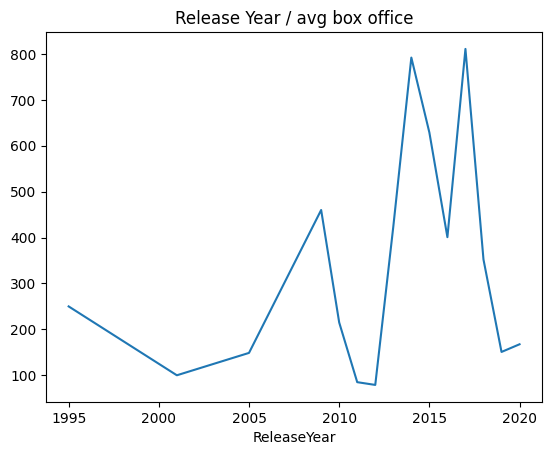

In [56]:
# Plotting for Release year and their avg box office
yearly_boxoffice = df_all.groupby('ReleaseYear')['BoxOffice (Crores)'].mean().plot(kind='line', title ='Release Year / avg box office')

## Inferences
- From this we can see an increase aroung 2015 - 2016 due to the rise of multiplexes like PVR's
- and also the middle class consumers increased in urban areas
- Increase in marketing and promotion due to the onset of social media and digital age
- The dip around 2019 -2020 is due to corona virus and its repercusiions.

# Analysis -2 

In [50]:
genre_ratings = df_all.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

In [51]:
genre_analysis = df_all.groupby('Genre').agg(avg_rating=('Rating', 'mean'),avg_boxoffice=('BoxOffice (Crores)', 'mean'),movie_count=('BoxOffice (Crores)', 'count')
).sort_values(by='avg_boxoffice', ascending=False)

In [52]:
genre_analysis

,avg_rating,avg_boxoffice,movie_count
Genre,,,
Biographical Sports Drama,8.000000,1177.500000,2
Epic Fantasy Action,8.140000,1114.000000,5
Science Fiction Action,6.900000,800.000000,2
Satirical Science Fiction Comedy,8.100000,792.000000,1
Historical Romance,7.500000,565.000000,1
Superhero Science Fiction,5.500000,530.000000,1
Action-Adventure,4.500000,335.000000,1
Historical Action,7.100000,299.333333,3
Action Thriller,6.797059,268.666667,12


## Inferences
- From the above table we can understand that good rating generally means good box office collection
- In general low box office collection is observed in lower rated movies even though there are some outliers like 'Family Drama'

# Analysis - 3

In [53]:
top_actors = df_all.groupby('LeadActor')['BoxOffice (Crores)'].mean().sort_values(ascending=False).reset_index()

In [54]:
top_actors

,LeadActor,BoxOffice (Crores)
0,Prabhas,924.285714
1,Aamir Khan,873.000000
2,Rajinikanth,800.000000
3,Hrithik Roshan,502.500000
4,Ranveer Singh,401.500000
5,Ajay Devgn,368.000000
6,Amitabh Bachchan,335.000000
7,Ranbir Kapoor,318.000000
8,Shah Rukh Khan,292.000000
9,Salman Khan,280.500000


<Axes: title={'center': 'Actors and avg collection'}, ylabel='LeadActor'>

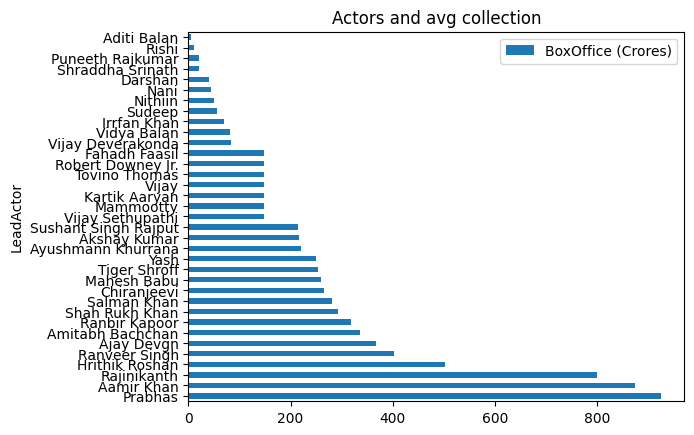

In [55]:
# Plotting for actors vs their mean collection
top_actors.sort_values('BoxOffice (Crores)', ascending = False).plot.barh(x= 'LeadActor', title = 'Actors and avg collection')

## Inferences
- We can clearly see an avg increase in collection once the lead actor is famous/superstar
- Lower known actors are getting less collection while industry leading actors are raving in more money.